In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

covid_raw = pd.read_csv("covid.csv")
covid_raw

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-28 02:32:31,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-28 02:32:31,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-28 02:32:31,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-28 02:32:31,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-28 02:32:31,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3409,NaN,NaN,NaN,West Bank and Gaza,2020-05-28 02:32:31,31.952200,35.233200,434,3,365,66,West Bank and Gaza
3410,NaN,NaN,NaN,Western Sahara,2020-05-28 02:32:31,24.215500,-12.885800,9,1,6,2,Western Sahara
3411,NaN,NaN,NaN,Yemen,2020-05-28 02:32:31,15.552727,48.516388,256,53,10,193,Yemen
3412,NaN,NaN,NaN,Zambia,2020-05-28 02:32:31,-13.133897,27.849332,1057,7,779,271,Zambia


In [7]:
covid_raw.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

In [8]:
covid_raw.shape

(3414, 12)

In [9]:
del_col_list = ['FIPS', 'Last_Update']

covid = covid_raw.drop(del_col_list, axis=1)
covid.head()

,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Abbeville,South Carolina,US,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,Ada,Idaho,US,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,Adair,Iowa,US,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [10]:
covid.columns = covid.columns.str.replace('Admin2','County')
covid.columns = covid.columns.str.replace('Long_','Long')
covid.head()

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Abbeville,South Carolina,US,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,Ada,Idaho,US,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,Adair,Iowa,US,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [11]:
print(covid.shape)
duplicate_rows_covid = covid[covid.duplicated()]
print(duplicate_rows_covid.shape)

(3414, 10)
(0, 10)


In [23]:
covid.columns

Index(['County', 'Province_State', 'Country_Region', 'Lat', 'Long',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [12]:
print(covid.isnull().sum())

County            401
Province_State    178
Country_Region      0
Lat                68
Long               68
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


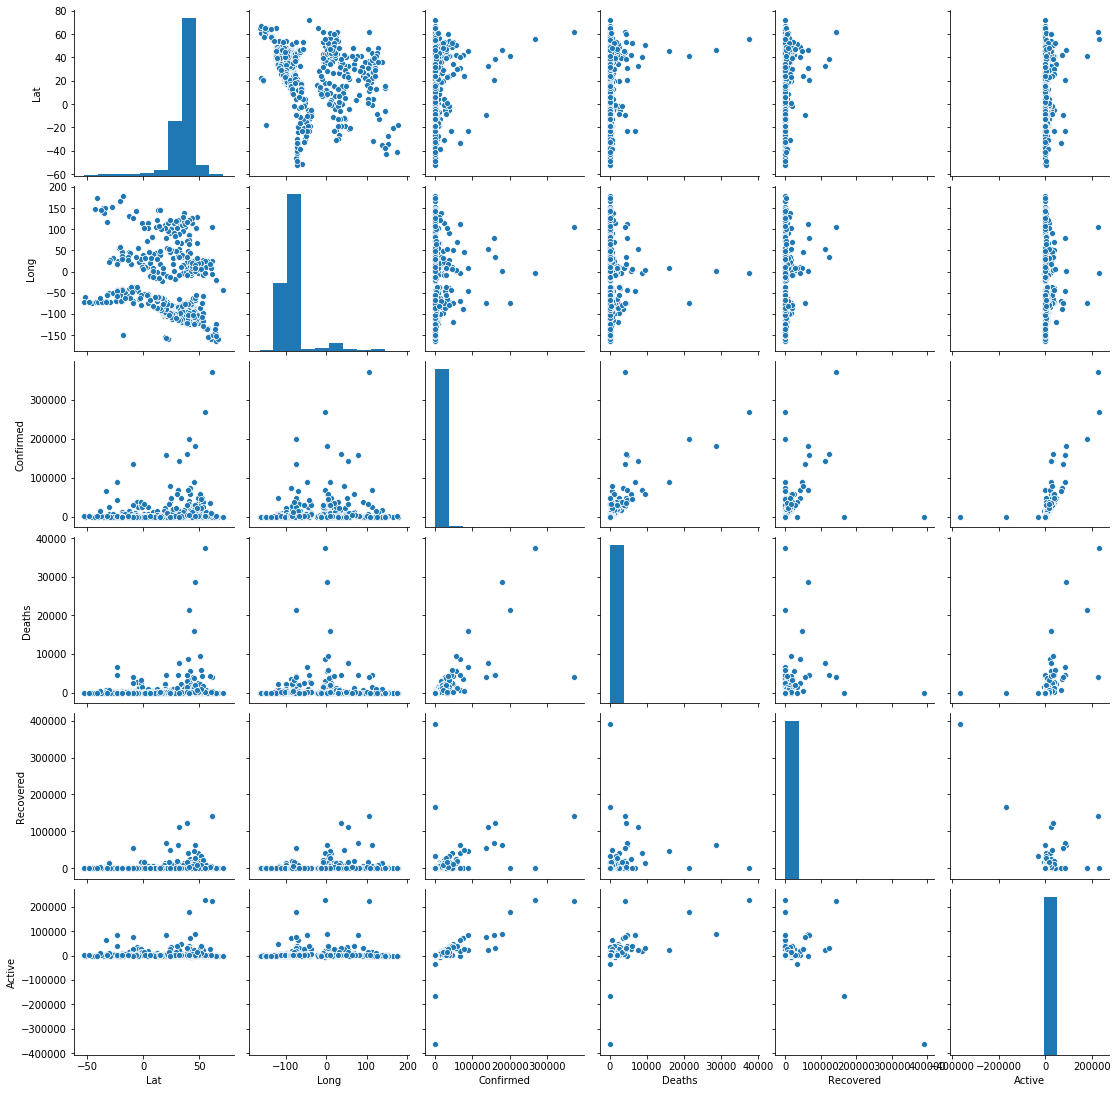

In [13]:
sns.pairplot(covid)
#there appears to be more confirmed cases and more deaths as latitude increases (north)

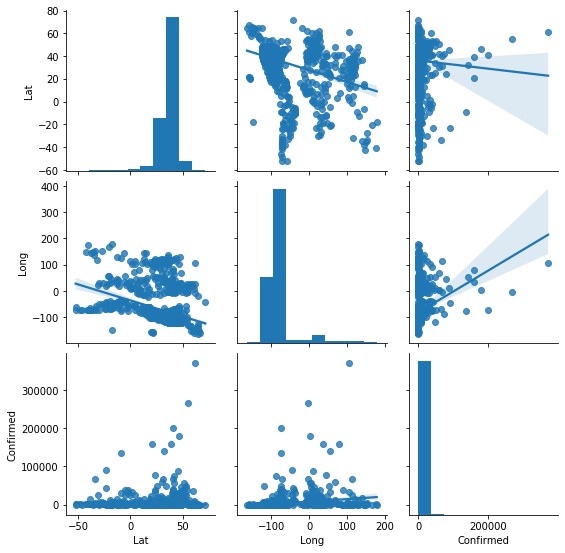

In [19]:
df_related = covid[['Lat','Long','Confirmed']]
sns.pairplot(df_related, kind='reg')

In [20]:
cases = covid.sort_values(by ='Confirmed', ascending=False)
cases

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key
3368,NaN,NaN,Russia,61.524010,105.318756,370680,3968,142208,224504,Russia
3404,NaN,NaN,United Kingdom,55.378100,-3.436000,267240,37460,0,229780,United Kingdom
1942,New York City,New York,US,40.767273,-73.971526,199968,21362,0,178606,"New York City, New York, US"
3293,NaN,NaN,France,46.227600,2.213700,180044,28546,64503,86995,France
3400,NaN,NaN,Turkey,38.963700,35.243300,159797,4431,122793,32573,Turkey
...,...,...,...,...,...,...,...,...,...,...
3222,NaN,Unknown,Spain,NaN,NaN,0,0,0,0,"Unknown, Spain"
2697,Unassigned,Indiana,US,NaN,NaN,0,159,0,-159,"Unassigned, Indiana, US"
2448,Sheridan,Nebraska,US,42.502844,-102.412661,0,0,0,0,"Sheridan, Nebraska, US"
955,Garfield,Washington,US,46.431975,-117.545403,0,0,0,0,"Garfield, Washington, US"


In [14]:
average_in_country = covid.groupby(["Country_Region"])[["Confirmed"]].mean()
average_in_country.sort_values(by='Confirmed', ascending = False)


,Confirmed
Country_Region,
Russia,370680.0
Turkey,159797.0
India,158086.0
Iran,141591.0
Peru,135905.0
...,...
Seychelles,11.0
MS Zaandam,9.0
Western Sahara,9.0


In [21]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 dataframe
    """
    
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Confirmed')

,3368,83
County,NaN,Arthur
Province_State,NaN,Nebraska
Country_Region,Russia,US
Lat,61.524,41.569
Long,105.319,-101.696
Confirmed,370680,0
Deaths,3968,0
Recovered,142208,0
Active,224504,0
Combined_Key,Russia,"Arthur, Nebraska, US"


In [22]:
  def find_min_max_in(col): 
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Deaths')


,3404,0
County,NaN,Abbeville
Province_State,NaN,South Carolina
Country_Region,United Kingdom,US
Lat,55.3781,34.2233
Long,-3.436,-82.4617
Confirmed,267240,35
Deaths,37460,0
Recovered,0,0
Active,229780,35
Combined_Key,United Kingdom,"Abbeville, South Carolina, US"


In [15]:
average_in_lat = covid.groupby(["Lat"])[["Confirmed"]].mean()
average_in_lat.sort_values(by='Confirmed', ascending = False)

,Confirmed
Lat,
61.524010,370680.0
55.378100,267240.0
40.767273,199968.0
46.227600,180044.0
38.963700,159797.0
...,...
41.915862,0.0
41.566503,0.0
46.233153,0.0


In [24]:
covid['fatalities'] = covid['Deaths'] / covid['Confirmed']
cols = covid.columns
covid = covid[cols]
covid.sort_values(by = ['fatalities'], ascending=False)

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key,fatalities
2687,Unassigned,Arizona,US,NaN,NaN,0,2,0,-2,"Unassigned, Arizona, US",inf
2733,Unassigned,Wyoming,US,NaN,NaN,0,13,0,-13,"Unassigned, Wyoming, US",inf
2717,Unassigned,North Dakota,US,NaN,NaN,0,8,0,-8,"Unassigned, North Dakota, US",inf
2711,Unassigned,Nevada,US,NaN,NaN,0,6,0,-6,"Unassigned, Nevada, US",inf
2703,Unassigned,Maryland,US,NaN,NaN,0,67,0,-67,"Unassigned, Maryland, US",inf
...,...,...,...,...,...,...,...,...,...,...,...
2839,Washington,Kansas,US,39.784208,-97.087532,0,0,0,0,"Washington, Kansas, US",NaN
3176,NaN,Recovered,US,NaN,NaN,0,0,391508,-364117,"Recovered, US",NaN
3219,NaN,Unknown,Brazil,NaN,NaN,0,0,166647,-166647,"Unknown, Brazil",NaN
3220,NaN,Unknown,Chile,NaN,NaN,0,0,33540,-33540,"Unknown, Chile",NaN
